# Import packages

In [1]:
import pandas as pd
import numpy as np
from numpy import datetime64
import warnings
from datetime import timedelta
import os

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Kim's working directory
# os.chdir('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/')

# Olivia's working ddirectory
os.chdir('/Users/OW/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/')

# Read in data

In [4]:
df = pd.read_excel('3_GENERATED WEEKLY FILES/SurveyExport_Merged.xlsx')

myth_vars = pd.read_csv('2_DATA_PROCESSING/myth_vars.csv')

unique_myths = myth_vars.survey_var.unique() # gets list of unique myths thesee all have numbers though
myth_vars.head()

,survey_var,result_var,inaccurate
0,M1_VaxFail,VaxFail,Yes
1,M10_KidMild,KidMild,Yes
2,M11_KidSafe,KidSafe,Yes
3,M12_Booster,Booster,Yes
4,M13_CovPill,CovPill,Yes


In [5]:
MIassess = df[["ExternalReference", "M_more", "surveydate", "M_more_react", "site"]].dropna()
pd.DataFrame(MIassess).to_excel('3_GENERATED WEEKLY FILES/MIassess.xlsx', header=True, index=False)

In [6]:
better = df[["ExternalReference", "STL_Better", "surveydate", "site"]].dropna()
STL_better = (better[(better['site'] == 'STL')])
CO_better = (better[(better['site'] == 'CO')])
NE_better = (better[(better['site'] == 'NE')])
BAL_better = (better[(better['site'] == 'BAL')])

In [7]:
pd.DataFrame(better).to_excel('3_GENERATED WEEKLY FILES/better.xlsx', header=True, index=False)
pd.DataFrame(STL_better).to_excel('3_GENERATED WEEKLY FILES/STL_better.xlsx', header=True, index=False)
pd.DataFrame(CO_better).to_excel('3_GENERATED WEEKLY FILES/CO_better.xlsx', header=True, index=False)
pd.DataFrame(NE_better).to_excel('3_GENERATED WEEKLY FILES/NE_better.xlsx', header=True, index=False)
pd.DataFrame(BAL_better).to_excel('3_GENERATED WEEKLY FILES/BAL_better.xlsx', header=True, index=False)

In [8]:
inaccurate = (myth_vars[(myth_vars['inaccurate'] == 'Yes')]).survey_var.unique()
accurate = (myth_vars[(myth_vars['inaccurate'] == 'No')]).survey_var.unique()

In [9]:
unique_sites = pd.unique(df['site'])
unique_sources = ['On social media', 'Other internet source', 'TV/radio']

In [10]:
result = []
result.append(['myth', 'survey_date', 'group', 'exposure', 'believe'])
print(type(result))

source_result = []
source_result.append(['myth', 'survey_date', 'source_pct', 'source'])

<class 'list'>


In [11]:
df_accurate = df[['surveydate', 'site']]
df_inaccurate = df[['surveydate', 'site']]

any_heard_result = []
any_heard_result.append(['surveydate', 'sum_inac', 'count_inac', 'inaccurate_pct', 'sum_acc', 'count_acc', 'accurate_pct', 'source'])
# In[25]:

#Create seperate dataframes for accurate and inaccurate myths
for each_myth in unique_myths:
    df_extracted = df[[each_myth]]
    if (each_myth in accurate):
        df_accurate = pd.concat([df_accurate, df_extracted], axis=1)

    if (each_myth in inaccurate):
        df_inaccurate = pd.concat([df_inaccurate, df_extracted], axis=1)


In [12]:
def any_heard(each_date, each_site):
    if(each_site == 'All'):
        acc_for_date = df_accurate.loc[df_accurate['surveydate'] == each_date]
        inacc_for_date = df_inaccurate.loc[df_inaccurate['surveydate'] == each_date]
        length_total = acc_for_date.shape[0]

        temp_acc = acc_for_date.iloc[:, 2:]
        temp_acc = temp_acc[(temp_acc == 'Yes').any(axis=1)]
        length_of_temp_acc = len(temp_acc[(temp_acc == 'Yes').any(axis=1)])

        temp_inacc = inacc_for_date.iloc[:, 2:]
        temp_inacc = temp_inacc[(temp_inacc == 'Yes').any(axis=1)]
        length_of_temp_inacc = len(temp_inacc[(temp_inacc == 'Yes').any(axis=1)])

        if(length_total > 0):
            row_to_input = [each_date, length_of_temp_inacc, length_total, round((length_of_temp_inacc / length_total), 2), length_of_temp_acc, length_total, round((length_of_temp_acc / length_total), 2), 'All']
        else:
            row_to_input = [each_date, length_of_temp_inacc, length_total, 0, length_of_temp_acc, length_total, 0, 'All']
        any_heard_result.append(row_to_input)

    elif (each_site != 'All'):
        acc_for_date = df_accurate[(df_accurate['surveydate'] == each_date) & (df_accurate['site'] == each_site)]
        inacc_for_date = df_inaccurate.loc[df_inaccurate['surveydate'] == each_date]
        length_total = acc_for_date.shape[0]

        temp_acc = acc_for_date.iloc[:, 2:]
        temp_acc = temp_acc[(temp_acc == 'Yes').any(axis=1)]
        length_of_temp_acc = len(temp_acc[(temp_acc == 'Yes').any(axis=1)])

        temp_inacc = inacc_for_date.iloc[:, 2:]
        temp_inacc = temp_inacc[(temp_inacc == 'Yes').any(axis=1)]
        length_of_temp_inacc = len(temp_inacc[(temp_inacc == 'Yes').any(axis=1)])

        if(length_total >  0):
            row_to_input = [each_date, length_of_temp_inacc, length_total, round((length_of_temp_inacc / length_total), 2), length_of_temp_acc, length_total, round((length_of_temp_acc / length_total), 2), each_site]

        else:
            row_to_input = [each_date, length_of_temp_inacc, length_total, 0, length_of_temp_acc, length_total, 0, 'All']
        any_heard_result.append(row_to_input)


In [13]:
def source_calculation(source_result, unique_sources, date_column, each_myth, each_site):
    if (each_site != 'All'):
        source_total = len(df_source[(df_source[each_myth] == 'Yes') & (df_source['site'] == each_site) & (df_source['surveydate'] == date_column)])
        source_said_yes_max = len(df_source[(df_source[each_myth + '_where'].str.contains('Family member or friend|Neighbor or coworker|Someone else')) &
                                            (df_source['site'] == each_site) &
                                            (df_source['surveydate'] == date_column)])
        each_source_max = 'Family friend or someone else'
        for each_source in unique_sources:
            source_said_yes = len(df_source[(df_source[each_myth + '_where'].str.contains(each_source)) & (df_source['site'] == each_site) & (df_source['surveydate'] == date_column)])
            if (source_said_yes > source_said_yes_max):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
            elif ((source_said_yes == source_said_yes_max) and (each_source == 'TV/Radio' or each_source == 'Other internet source')):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
        if (source_said_yes_max > 0 and source_total > 0):
            row_to_input = [each_myth, date_column, round((source_said_yes_max / source_total) * 100, 1), each_source_max, each_site]
            source_result.append(row_to_input)
    elif(each_site == 'All'):
        source_total = len(df_source[(df_source[each_myth] == 'Yes') & (df_source['surveydate'] == date_column)])
        source_said_yes_max = len(df_source[(df_source[each_myth + '_where'].str.contains('Family member or friend|Neighbor or coworker|Someone else')) &
                                            (df_source['surveydate'] == date_column)])
        each_source_max = 'Family friend or someone else'
        for each_source in unique_sources:
            source_said_yes = len(df_source[(df_source[each_myth + '_where'].str.contains(each_source)) & (df_source['surveydate'] == date_column)])
            if (source_said_yes > source_said_yes_max):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
            elif ((source_said_yes == source_said_yes_max) and (each_source == 'TV/Radio' or each_source == 'Other internet source')):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
        if (source_said_yes_max > 0 and source_total > 0):
            row_to_input = [each_myth, date_column, round((source_said_yes_max / source_total) * 100, 1), each_source_max, 'All']
            source_result.append(row_to_input)


In [14]:
def populate_results(result, unique_column, column_name, date_column, each_myth, each_site):
    if (each_site != 'All' and column_name  != 'All'):
        for each_value in unique_column:
            myth_total = len(df1[(df1[column_name] == each_value) & (df1['site'] == each_site) & (df1['surveydate'] == date_column)])
            myth_yes = len(df1[(df1[column_name] == each_value) & (df1['site'] == each_site) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

            df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
            df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

            believe_total = len(df3[(df3['sub_rank'] == 1) & (df3[column_name] == each_value) & (df3['site'] == each_site)])
            believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3[column_name] == each_value) & (df3['site'] == each_site)])

            if (believe_total != 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), each_site]
                result.append(single_all_row)
            
            elif (believe_total == 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, 0, 0, each_site]
                result.append(single_all_row)

    elif(each_site == 'All' and column_name != 'All'):
        for each_value in unique_column:
            myth_total = len(df1[(df1[column_name] == each_value) & (df1['surveydate'] == date_column)])
            myth_yes = len(df1[(df1[column_name] == each_value) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

            df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
            df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

            believe_total = len(df3[(df3['sub_rank'] == 1) & (df3[column_name] == each_value)])
            believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3[column_name] == each_value)])

            if (believe_total != 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), 'All']
                result.append(single_all_row)
                
            elif (believe_total == 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, 0, 0, each_site]
                result.append(single_all_row)

    elif (each_site != 'All' and column_name == 'All'):
        myth_total = len(df1[(df1['site'] == each_site) & (df1['surveydate'] == date_column)])
        myth_yes = len(df1[(df1['site'] == each_site) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

        df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

        believe_total = len(df3[(df3['sub_rank'] == 1) & (df3['site'] == each_site)])
        believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3['site'] == each_site)])

        if (believe_total != 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), each_site]
            result.append(single_all_row)
            
        elif (believe_total == 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', 0, 0, each_site]
            result.append(single_all_row)

    elif (each_site == 'All' and column_name == 'All'):
        myth_total = len(df1[(df1['surveydate'] == date_column)])
        myth_yes = len(df1[(df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

        df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

        believe_total = len(df3[(df3['sub_rank'] == 1)])
        believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1)])

        if (believe_total != 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', round((myth_yes / myth_total) * 100, 1), round((believe_first / believe_total) * 100, 1), 'All']
            result.append(single_all_row)
            
        elif (believe_total == 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', 0, 0, each_site]
            result.append(single_all_row)
            

In [15]:
for each_myth in unique_myths:
    if each_myth in df:
        df1 = df[[each_myth, 'age_cat_current', 'gender_cat', 'race_cat', 'partype', 'surveydate', 'site']].dropna()
        unique_survey_dates = df1.surveydate.unique()
        unique_race = df1.race_cat.unique()
        unique_gender = df1.gender_cat.unique()
        unique_age_current= df1.age_cat_current.unique()
        unique_partype = df1.partype.unique()

        df_believe = df[[each_myth, each_myth + '_react', 'age_cat_current', 'gender_cat', 'race_cat', 'partype', 'surveydate', 'ExternalReference', 'site']].dropna()

        df_source = df[[each_myth, each_myth + '_where', 'surveydate', 'site']].dropna()
        unique_sources = df_source[each_myth + '_where'].unique()

    #############################################################################
    # new code to calculate sources information:
    # if each_myth in df.columns:


        if each_myth in inaccurate:
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it could be true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Not sure if it\'s true or untrue'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely not true'], 0)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it\'s not true'], 0)

        if each_myth in accurate:
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it could be true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Not sure if it\'s true or untrue'], 0)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely not true'], 0)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it\'s not true'], 0)

        df_believe['sub_rank'] = df_believe.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df_believe = df_believe.astype({'surveydate': datetime64})

        df_believe_not_null = df_believe.loc[df_believe[each_myth].notnull()]

        for date_column in unique_survey_dates:
            # For each race
            unique_column = unique_race
            column_name = 'race_cat'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

            # For each gender
            unique_column = unique_gender
            column_name = 'gender_cat'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)
            
            # For each age current
            unique_column = unique_age_current
            column_name = 'age_cat_current'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

           # For each partype
            unique_column = unique_partype
            column_name = 'partype'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

            for each_site in unique_sites:
                populate_results(result, 'All', 'All', date_column, each_myth, each_site)
                source_calculation(source_result, unique_sources, date_column, each_myth, each_site)
                any_heard(date_column, each_site)
                
            populate_results(result, 'All', 'All', date_column, each_myth, 'All')
            source_calculation(source_result, unique_sources, date_column, each_myth, 'All')
            any_heard(date_column, 'All')

In [16]:
# rename myth variable in myth_vars to myth for merging
myth_vars2 = myth_vars.rename(columns={"survey_var": "myth"})

# drop result_var
myth_vars2 = myth_vars2.drop(columns = ['result_var'])
myth_vars2.rename(columns=myth_vars2.iloc[1])
myth_vars2.head()

,myth,inaccurate
0,M1_VaxFail,Yes
1,M10_KidMild,Yes
2,M11_KidSafe,Yes
3,M12_Booster,Yes
4,M13_CovPill,Yes


In [17]:
result = pd.DataFrame(result)
new_header = result.iloc[0] # grab the first row for the header
result = result[1:] # take the data less the header row
result.columns = new_header # set the header row as the df header

In [18]:
result.head()

,myth,survey_date,group,exposure,believe,None
1,M1_VaxFail,2021-08-31T00:00:00.000000000,White,66.7,16.7,STL
2,M1_VaxFail,2021-08-31T00:00:00.000000000,Other race,50.0,0.0,STL
3,M1_VaxFail,2021-08-31T00:00:00.000000000,Female,57.1,25.0,STL
4,M1_VaxFail,2021-08-31T00:00:00.000000000,Male,100.0,0.0,STL
5,M1_VaxFail,2021-08-31T00:00:00.000000000,Other sex,0,0,STL


In [19]:
# Merge in accuracy of myth variable
results = pd.merge(result, myth_vars2)

In [20]:
results.head()

,myth,survey_date,group,exposure,believe,None,inaccurate
0,M1_VaxFail,2021-08-31T00:00:00.000000000,White,66.7,16.7,STL,Yes
1,M1_VaxFail,2021-08-31T00:00:00.000000000,Other race,50.0,0.0,STL,Yes
2,M1_VaxFail,2021-08-31T00:00:00.000000000,Female,57.1,25.0,STL,Yes
3,M1_VaxFail,2021-08-31T00:00:00.000000000,Male,100.0,0.0,STL,Yes
4,M1_VaxFail,2021-08-31T00:00:00.000000000,Other sex,0,0,STL,Yes


In [21]:
# Code threat levels
results['risk'] = 100 *(results.exposure * results.believe/(100*100))

In [22]:
# take the inverse for accurate information items
results.risk = np.where(results.inaccurate == 'Yes', results.risk, results.risk *  -1) # np.where is like ifelse
results.sort_values(by=['risk'])

,myth,survey_date,group,exposure,believe,None,inaccurate,risk
17300,M140_ChrDMMoun,2023-11-18T00:00:00.000000000,Missing birthdate,100.0,100.0,CO,No,-100.0
12102,M109_CovMonvx,2023-09-09T00:00:00.000000000,>=60,100.0,100.0,CO,No,-100.0
12106,M109_CovMonvx,2023-09-09T00:00:00.000000000,Front Line,100.0,100.0,NE,No,-100.0
15300,M132_CovTstKts,2023-10-07T00:00:00.000000000,50-59,100.0,100.0,NE,No,-100.0
12110,M109_CovMonvx,2023-09-09T00:00:00.000000000,All,100.0,100.0,NE,No,-100.0
...,...,...,...,...,...,...,...,...
17023,M138_ConEyeSfe,2023-11-18T00:00:00.000000000,Other sex,100.0,100.0,NE,Yes,100.0
15211,M131_VaxFluMMR,2023-10-28T00:00:00.000000000,Other sex,100.0,100.0,CO,Yes,100.0
17155,M139_ChrNoMam,2023-11-18T00:00:00.000000000,Other sex,100.0,100.0,CO,Yes,100.0
1116,M19_ClothMask,2022-01-23T00:00:00.000000000,Other sex,100.0,100.0,STL,Yes,100.0


In [23]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17760 entries, 0 to 17759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   myth         17760 non-null  object
 1   survey_date  17760 non-null  object
 2   group        17760 non-null  object
 3   exposure     17760 non-null  object
 4   believe      17760 non-null  object
 5   None         17760 non-null  object
 6   inaccurate   17760 non-null  object
 7   risk         17760 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [24]:
results['risk_level'] = np.where(results.inaccurate == "Yes",
                                 pd.cut(results.risk, [0, 5, 20, 100], 
                                        labels=("low", "moderate", "high"),
                                        include_lowest=True),
                                 pd.cut(results.risk, [-100, -20, -5, 0], 
                                        labels=("low", "moderate", "high"), 
                                        include_lowest=True))

In [25]:
results.head()

,myth,survey_date,group,exposure,believe,None,inaccurate,risk,risk_level
0,M1_VaxFail,2021-08-31T00:00:00.000000000,White,66.7,16.7,STL,Yes,11.1389,moderate
1,M1_VaxFail,2021-08-31T00:00:00.000000000,Other race,50.0,0.0,STL,Yes,0.0,low
2,M1_VaxFail,2021-08-31T00:00:00.000000000,Female,57.1,25.0,STL,Yes,14.275,moderate
3,M1_VaxFail,2021-08-31T00:00:00.000000000,Male,100.0,0.0,STL,Yes,0.0,low
4,M1_VaxFail,2021-08-31T00:00:00.000000000,Other sex,0,0,STL,Yes,0.0,low


In [26]:
results['survey_date']= pd.to_datetime(results['survey_date']) # convert the 'surveydate' column to date format
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17760 entries, 0 to 17759
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   myth         17760 non-null  object        
 1   survey_date  17760 non-null  datetime64[ns]
 2   group        17760 non-null  object        
 3   exposure     17760 non-null  object        
 4   believe      17760 non-null  object        
 5   None         17760 non-null  object        
 6   inaccurate   17760 non-null  object        
 7   risk         17760 non-null  object        
 8   risk_level   17760 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.4+ MB


In [27]:
# merge in myth name and drop myth column or strip everything including _ before name
results['myth'] = results['myth'].str.replace('..+?\_', '', 1, regex = True)

In [28]:
# name site column site
results.rename(columns={None:'site'}, inplace=True) #Note: None is a system column name with no single quotes

In [29]:
results.tail()
list(results.columns)

['myth',
 'survey_date',
 'group',
 'exposure',
 'believe',
 'site',
 'inaccurate',
 'risk',
 'risk_level']

In [30]:
# change date format and get site specific files
results['survey_date'] = pd.to_datetime(results['survey_date']).dt.date
STL_results = (results[(results['site'] == 'STL')])
CO_results = (results[(results['site'] == 'CO')])
NE_results = (results[(results['site'] == 'NE')])
BAL_results = (results[(results['site'] == 'BAL')])

# export site specific files
pd.DataFrame(results).to_csv('3_GENERATED WEEKLY FILES/M_all2.csv', index = False)
pd.DataFrame(STL_results).to_csv('3_GENERATED WEEKLY FILES/STL_M_all2.csv', index = False)
pd.DataFrame(CO_results).to_csv('3_GENERATED WEEKLY FILES/CO_M_all2.csv', index = False)
pd.DataFrame(NE_results).to_csv('3_GENERATED WEEKLY FILES/NE_M_all2.csv', index = False)
pd.DataFrame(BAL_results).to_csv('3_GENERATED WEEKLY FILES/BAL_M_all2.csv', index = False)

In [31]:
results.head()
BAL_results.head()

,myth,survey_date,group,exposure,believe,site,inaccurate,risk,risk_level
14238,InfRSV23,2023-12-09,Black or African American,33.3,100.0,BAL,No,-33.3,low
14247,InfRSV23,2023-12-09,Female,33.3,100.0,BAL,No,-33.3,low
14264,InfRSV23,2023-12-09,40-49,0,0,BAL,No,-0.0,high
14265,InfRSV23,2023-12-09,18-29,0,0,BAL,No,-0.0,high
14266,InfRSV23,2023-12-09,30-39,100.0,100.0,BAL,No,-100.0,low


In [32]:
# identify retiring items for ALL sites
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
flag = results.loc[(results['survey_date'] > (results['survey_date'].max()-timedelta(days=20))) & (results['site'] == 'All')]
flag = flag.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag = flag.loc[(flag[flag.columns[-1]] < 15)]
flag

survey_date,2023-11-25,2023-12-02,2023-12-09
myth,,,
VaxIncCVA,13.1,11.7,11.8


In [33]:
a = list(flag.index.values)
for i in a:
    flag_each_site = results.loc[(results['survey_date'] > (results['survey_date'].max()-timedelta(days=20))) & (results['myth'] == i) & (results['group'] == 'All') & (results['site'] != 'All')]
    flag_each_site = flag_each_site[['myth', 'survey_date', 'site', 'exposure']]
    flag_each_site = flag_each_site.sort_values(by=['site', 'survey_date'])
    print(flag_each_site)

            myth survey_date site exposure
16965  VaxIncCVA  2023-12-09  BAL        0
16872  VaxIncCVA  2023-11-25   CO     15.4
16915  VaxIncCVA  2023-12-02   CO     16.4
16964  VaxIncCVA  2023-12-09   CO     24.4
16871  VaxIncCVA  2023-11-25   NE     30.0
16914  VaxIncCVA  2023-12-02   NE     23.6
16963  VaxIncCVA  2023-12-09   NE     17.1
16870  VaxIncCVA  2023-11-25  STL      4.5
16913  VaxIncCVA  2023-12-02  STL      4.0
16962  VaxIncCVA  2023-12-09  STL      2.6


In [34]:
# identify retiring items for STL
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
flag_STL = STL_results.loc[(STL_results['survey_date'] > (STL_results['survey_date'].max()-timedelta(days=20))) & (STL_results['group'] == 'All')]
flag_STL = flag_STL.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag_STL = flag_STL.loc[(flag_STL[flag_STL.columns[-1]] < 15)]
flag_STL

survey_date,2023-11-25,2023-12-02,2023-12-09
myth,,,
VaxIncCVA,4.5,4.0,2.6


In [35]:
# identify retiring items for CO
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
flag_CO = CO_results.loc[(CO_results['survey_date'] > (CO_results['survey_date'].max()-timedelta(days=20))) & (CO_results['group'] == 'All')]
flag_CO = flag_CO.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag_CO = flag_CO.loc[(flag_CO[flag_CO.columns[-1]] < 15)]
flag_CO

survey_date,2023-11-25,2023-12-02,2023-12-09
myth,,,


In [36]:
# identify retiring items for NE
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
flag_NE = NE_results.loc[(NE_results['survey_date'] > (NE_results['survey_date'].max()-timedelta(days=20))) & (NE_results['group'] == 'All')]
flag_NE = flag_NE.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag_NE = flag_NE.loc[(flag_NE[flag_NE.columns[-1]] < 15)]
flag_NE

survey_date,2023-11-25,2023-12-02,2023-12-09
myth,,,


In [52]:
# identify retiring items for BAL
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
flag_BAL = BAL_results.loc[(BAL_results['survey_date'] > (BAL_results['survey_date'].max()-timedelta(days=20))) & (BAL_results['group'] == 'All')]
flag_BAL = flag_BAL.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag_BAL = flag_BAL.loc[(flag_NE[flag_BAL.columns[-1]] < 15)]
flag_BAL

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [37]:
# longitudinal analysis for PreventionFreq
prevent = df.loc[df['surveydate'] >= "2023-02-18"]
a = prevent['PreventionFreq'].groupby(prevent['surveydate']).value_counts(normalize=True).reset_index(name='percent')
a = pd.DataFrame(a)
a.columns = ["surveydate", "response", "percentage"]

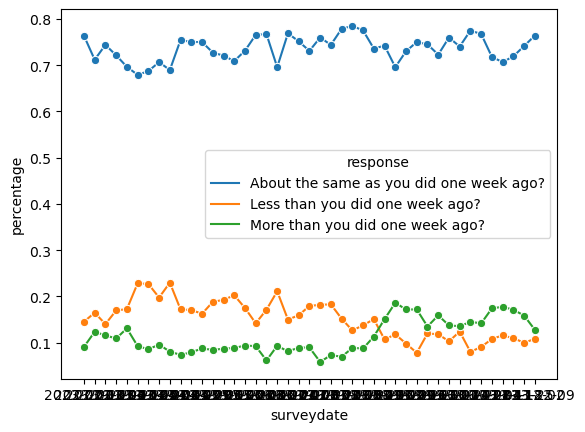

In [38]:
import seaborn as sns
p = sns.lineplot(x='surveydate', y='percentage', hue='response', data=a, marker="o")
p.set_xticks(a['surveydate'].unique())

In [39]:
source_result = pd.DataFrame(source_result)
source_result.head()

,0,1,2,3,4
0,myth,survey_date,source_pct,source,None
1,M1_VaxFail,2021-08-31T00:00:00.000000000,57.1,Family friend or someone else,STL
2,M1_VaxFail,2021-08-31T00:00:00.000000000,57.1,Family friend or someone else,All
3,M1_VaxFail,2021-09-06T00:00:00.000000000,75.0,Family friend or someone else,STL
4,M1_VaxFail,2021-09-06T00:00:00.000000000,75.0,Family friend or someone else,All


In [40]:
# change first row to header row
source_result = pd.DataFrame (source_result)
header_row = 0
source_result.columns = source_result.iloc[header_row]
source_result = source_result.drop(source_result.index[[0]])

In [41]:
source_result.head()

,myth,survey_date,source_pct,source,None
1,M1_VaxFail,2021-08-31T00:00:00.000000000,57.1,Family friend or someone else,STL
2,M1_VaxFail,2021-08-31T00:00:00.000000000,57.1,Family friend or someone else,All
3,M1_VaxFail,2021-09-06T00:00:00.000000000,75.0,Family friend or someone else,STL
4,M1_VaxFail,2021-09-06T00:00:00.000000000,75.0,Family friend or someone else,All
5,M1_VaxFail,2021-09-13T00:00:00.000000000,75.0,Family friend or someone else,STL


In [42]:
# df['date'] = pd.to_datetime(df['date']).dt.date
source_result['survey_date'] = pd.to_datetime(source_result['survey_date']).dt.date

In [43]:
# name site column site
source_result.rename(columns={None:'site'}, inplace=True) # Note: None is a system column name with no single quotes

In [44]:
source_result.head()

,myth,survey_date,source_pct,source,site
1,M1_VaxFail,2021-08-31,57.1,Family friend or someone else,STL
2,M1_VaxFail,2021-08-31,57.1,Family friend or someone else,All
3,M1_VaxFail,2021-09-06,75.0,Family friend or someone else,STL
4,M1_VaxFail,2021-09-06,75.0,Family friend or someone else,All
5,M1_VaxFail,2021-09-13,75.0,Family friend or someone else,STL


In [45]:
# strip everything including _ before name
source_result['myth'] = source_result['myth'].str.replace('..+?\_', '', 1, regex = True)

In [46]:
STL_source_result = (source_result[(source_result['site'] == 'STL')])
CO_source_result = (source_result[(source_result['site'] == 'CO')])
NE_source_result = (source_result[(source_result['site'] == 'NE')])
BAL_source_result = (source_result[(source_result['site'] == 'BAL')])

In [47]:
pd.DataFrame(source_result).to_csv('3_GENERATED WEEKLY FILES/Top_Sources.csv', header=True, index=False)
pd.DataFrame(STL_source_result).to_csv('3_GENERATED WEEKLY FILES/STL_Top_Sources.csv', header=True, index=False)
pd.DataFrame(CO_source_result).to_csv('3_GENERATED WEEKLY FILES/CO_Top_Sources.csv', header=True, index=False)
pd.DataFrame(NE_source_result).to_csv('3_GENERATED WEEKLY FILES/NE_Top_Sources.csv', header=True, index=False)
pd.DataFrame(BAL_source_result).to_csv('3_GENERATED WEEKLY FILES/BAL_Top_Sources.csv', header=True, index=False)

In [48]:
pd.DataFrame(any_heard_result).to_csv('3_GENERATED WEEKLY FILES/any_heard.csv', index = False)